In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글
import matplotlib.font_manager as fm
import matplotlib
font_loc = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

# - 부호 깨지는 것 방지
plt.rcParams['axes.unicode_minus'] = False

# 컬럼 표시 제한
# pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_excel('./korea_economy.xlsx')

result = []
for i in data['연월']:
    result.append(i.split('/')[0])

data.insert(2, '년도', result)                
del data['Unnamed: 0']
data['년도'] = data['년도'].astype(int)

## ※ 데이터 분석 파트와 합치려면 ↓이 아래 부분만 합치면 됨

### - 회귀분석

In [3]:
# 한국
df_regression = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 20, 24, 25, 29, 30, 35, 37, 38, 40]]
df_regression

,연월,년도,미국_금리(%),일본_금리(%),중국_금리(%),한국_금리(%),원/미국달러(매매기준율),원/위안(매매기준율),원/일본엔(100엔),한국(KOSPI)(1980.1.4=100),한국_외환보유액(달러),한국_경제성장률(%),경상수지(달러),미국장단기(국채)금리차,외채비율(%),무역수지(달러),단기외채(달러),단기외채/외환보유액,Class
0,1995/01,1995,5.500,1.75,12.06,14.01,786.7,93.548540,791.65,925.56,25634400000000,9.6,-1209000000,0.34,0.470935,-1201000000,36200000000,1.790688,0
1,1995/02,1995,6.000,1.75,12.06,14.01,786.0,93.659190,809.47,885.69,25752333000000,9.6,-1522000000,0.43,0.470935,-1462000000,36200000000,1.782530,0
2,1995/03,1995,6.000,1.75,12.06,14.01,771.5,91.628691,862.25,931.78,25878700000000,9.6,-1562000000,0.40,0.470935,-1668000000,36200000000,1.771330,0
3,1995/04,1995,6.000,1.00,12.06,14.01,761.8,90.676071,904.21,897.00,26551800000000,9.6,-748000000,0.47,0.470935,-934000000,41900000000,1.995662,0
4,1995/05,1995,6.000,1.00,12.06,13.51,760.1,91.246764,913.58,882.50,27068000000000,9.6,-959000000,0.41,0.470935,-1171000000,41900000000,1.958120,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022/04,2022,0.375,-0.10,3.70,1.50,1269.4,192.030000,970.16,2695.05,425076761000000,0.7,-79000000,0.19,0.419000,-2508000000,174900000000,0.389274,2
328,2022/05,2022,0.875,-0.10,3.70,1.75,1245.8,186.400000,975.61,2685.90,423355152000000,0.7,3860000000,0.32,0.419000,-1614000000,174900000000,0.390654,2
329,2022/06,2022,1.625,-0.10,3.70,1.75,1292.9,192.750000,946.45,2332.64,414491928000000,0.7,5610000000,0.06,0.419000,-2487000000,174900000000,0.399061,2
330,2022/07,2022,2.375,-0.10,3.70,2.25,1304.0,193.350000,970.53,2451.50,415046922000000,0.7,1089000000,-0.22,0.419000,-4805000000,183800000000,0.419056,2


### - 훈련(train), 검증(valid), 테스트(test) 분류
### → 훈련데이터를 다시 7.5 : 2.5 비율의 훈련데이터(train_2)와 검증데이터(valid)로 나눔
### → 학습을 진행하여 이를 바탕으로 테스트데이터(test)의 y값(외환위기 리스크 수준)을 예측

In [4]:
x_train = df_regression.iloc[:251, 2:-1]
x_test = df_regression.iloc[251:, 2:-1]

y_train = df_regression.iloc[:251, -1]
y_test = df_regression.iloc[251:, -1]

In [5]:
from sklearn.model_selection import train_test_split
x_train_2, x_val, y_train_2, y_val = train_test_split(x_train, y_train, random_state=2)

### 기존의 df에 새로운 컬럼을 추가
### → 회귀분석을 위해서는 정답이 되는 y 컬럼이 필요함
### → 현재의 경제적 상황을 판단하는 데 필요한 지표는 여러가지가 있음
### → 그 중에서 하나의 지표만으로는 정확한 경제적 상황을 판단할 수 없음
### → 따라서 새로운 컬럼을 생성하여 지난 30년의 기간의 리스크 수준을 세 종류로 분류하여 회귀분석을 실시
### → 리스크 수준(y)을 IMF 구제 요청 기간(외환위기)은 1, 대침체 기간(금융위기)은 2, 나머지 대부분의 기간은 0으로 설정
### → 회귀분석 시작

In [6]:
# 0 : 평소
# 1 : 외환위기(1997.12 ~ 2001.8 → IMF 기간 지정)
# 2 : 금융위기(2007.4 ~ 2009.4 → 대침체 기간 지정)

In [7]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
model.fit(x_train_2, y_train_2)

pred_train = model.predict(x_train_2)
pred_test = model.predict(x_val)

prob_train = model.predict_proba(x_train_2)
prob_test = model.predict_proba(x_val)

print('test score : ', model.score(x_test, y_test))

pred_test_2 = model.predict(x_test)

test score :  0.9135802469135802


In [8]:
pred_test_2_df = pd.DataFrame(pred_test_2)
pred_test_2_df.columns = ['리스크 분류(0:평시, 1:외환위기, 2:금융위기)']

df_data = pd.DataFrame(df_regression['연월'].iloc[251:].values)
df_data.columns = ['연월']

df_pred = pd.concat([df_data, pred_test_2_df], axis=1)
df_pred.tail(10)

,연월,"리스크 분류(0:평시, 1:외환위기, 2:금융위기)"
71,2021/11,0
72,2021/12,0
73,2022/01,0
74,2022/02,0
75,2022/03,0
76,2022/04,0
77,2022/05,0
78,2022/06,0
79,2022/07,0
80,2022/08,2


### → 2022년 대부분의 리스크 수준을 0(평시)으로 분류하고 가장 최근인 2022년 8월은 2(금융위기)로 분류
### → 각 리스크 분류에 대한 확률을 확인해보자

In [9]:
# 랜덤포레스트 predict_proba
prob_test_2 = model.predict_proba(x_test)

prob_test_2_df = pd.DataFrame(prob_test_2)
prob_test_2_df.columns = ['평시', '외환위기 리스크', '금융위기 리스크']

df_data = pd.DataFrame(df_regression['연월'].iloc[251:].values)
df_data.columns = ['연월']

df_prob = pd.concat([df_data, prob_test_2_df], axis=1)
df_prob

,연월,평시,외환위기 리스크,금융위기 리스크
0,2015/12,1.00,0.00,0.00
1,2016/01,0.99,0.01,0.00
2,2016/02,0.88,0.01,0.11
3,2016/03,1.00,0.00,0.00
4,2016/04,1.00,0.00,0.00
...,...,...,...,...
76,2022/04,0.60,0.04,0.36
77,2022/05,0.67,0.01,0.32
78,2022/06,0.59,0.05,0.36
79,2022/07,0.53,0.06,0.41


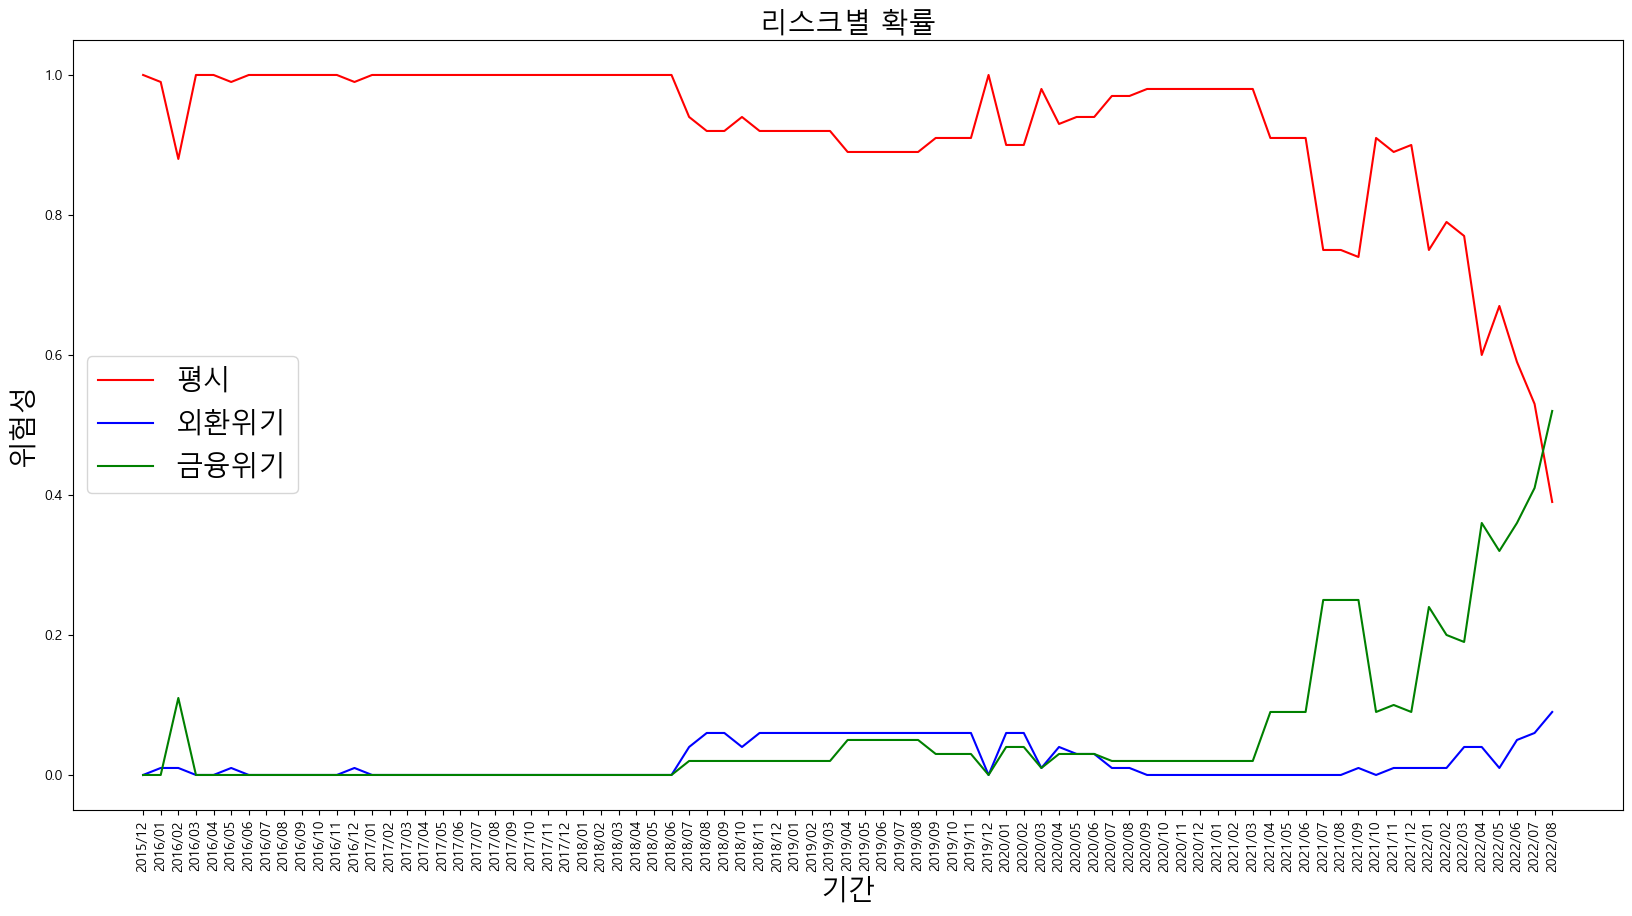

In [10]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_prob, x='연월', y='평시', c='r', errorbar=None, legend=True)
sns.lineplot(data=df_prob, x='연월', y='외환위기 리스크', c='b', errorbar=None, legend=True)
sns.lineplot(data=df_prob, x='연월', y='금융위기 리스크', c='g', errorbar=None, legend=True)

plt.title('리스크별 확률', fontsize=20)
plt.xlabel('기간', fontsize=20)
plt.ylabel('위험성', fontsize=20)
plt.legend(['평시', '외환위기', '금융위기'], fontsize=20, loc='best')
plt.xticks(rotation=90)
plt.show()

### → 가장 최근(2022년 8월 데이터)으로 갈수록 2(금융위기)의 확률이 급격하게 증가하고 있음을 알 수 있음
### → 외환위기보다는 2008년 금융위기와 유사한 상황이 될 위험성이 높음
### → 금융위기 리스크가 시간이 지날수록 증가하는 추세를 보이기 때문에 단기적인 위기라고 속단하기에는 무리가 있음

### - 회귀분석 결과에 영향을 준 지표들

In [11]:
# 그리드 서치
from sklearn.model_selection import GridSearchCV
param_grid = {'random_state' : range(50, 100, 1)}
gridsearch = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy', return_train_score=True, cv=5)
gridsearch.fit(x_train, y_train)

print('최적의 파라미터 : ', gridsearch.best_params_)
print('최적의 정확도 : ', gridsearch.best_score_)
print('테스트셋 정확도 : ', gridsearch.score(x_test, y_test))

최적의 파라미터 :  {'random_state': 60}
최적의 정확도 :  0.7429803921568627
테스트셋 정확도 :  0.9012345679012346


In [12]:
# 중요 feature
# df_regression 컬럼에서 날짜 컬럼과 class 컬럼 제외
df_columns = list(df_regression.columns)[2:-1]

best = gridsearch.best_estimator_
a = best.feature_importances_
b = df_columns

feature_df = pd.DataFrame(data=a, index=b)
feature_df.columns = ['feature_importance']
feature_df = feature_df.sort_values(by='feature_importance', ascending=False)
feature_df_10 = feature_df.iloc[:10, :]
feature_df_10

,feature_importance
단기외채(달러),0.109066
한국_외환보유액(달러),0.102865
한국_금리(%),0.097276
외채비율(%),0.095696
한국(KOSPI)(1980.1.4=100),0.085982
단기외채/외환보유액,0.084033
원/일본엔(100엔),0.068877
원/미국달러(매매기준율),0.061138
미국장단기(국채)금리차,0.060923
일본_금리(%),0.054518


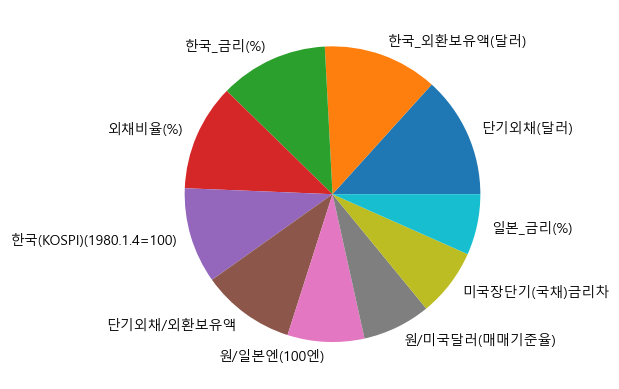

In [13]:
# 중요 feature 시각화
plt.pie(feature_df_10.feature_importance, labels=feature_df_10.index)
plt.show()

### → 분석을 시작 할 때 주요 지표로 선정한 지표 : 금리, 환율, 경상수지, 외환보유액, 단기외채
### → 분석에 사용한 주요 지표와 회귀분석 결과에 영향을 미친 지표들이 상당 부분 일치하는 결과를 보임

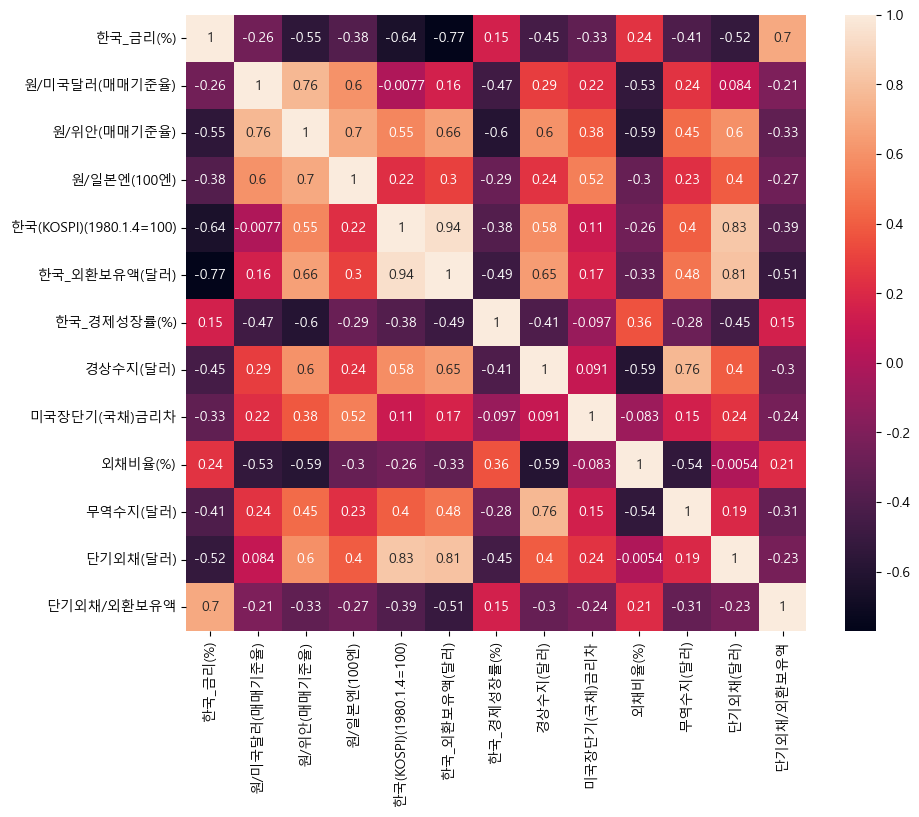

In [14]:
# 상관관계 분석 히트맵
df_corr = df_regression.iloc[:, 5:-1]
df_corr = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True)
plt.show()